# This regression script models houses that were sold for under $1,000,000.

In [1]:
# Import libraries for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np# This regression script models houses that were sold for over $1,000,000.
import seaborn as sns
%matplotlib inline

# Import libraries for regression modeling
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
# Import data from csv file
original_data = pd.read_csv('../source_data/housing_data_cleaned.csv')

df = original_data.select_dtypes(exclude=object)
df.head()

,id,census_tract,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,garage_spaces,geographic_ward,...,number_of_rooms,number_stories,quality_grade,sale_price,taxable_building,taxable_land,total_area,total_livable_area,year_built,zip_code
0,1,241,67.0,49200,0,4,0,14.00,0,59,...,8,3,NaN,90000,78887,22513,938.00,1344,1895,19144
1,2,201,70.0,0,0,4,0,14.91,0,13,...,6,2,NaN,52500,40800,7200,1044.00,1190,1940,19140
2,3,281,95.5,0,0,4,0,17.66,1,17,...,6,2,NaN,154000,88400,15600,1686.53,1633,1940,19141
3,4,293,112.5,0,0,4,0,19.25,0,23,...,6,2,NaN,65900,53986,11214,2165.62,1320,1940,19124
4,5,62,79.0,0,0,4,0,16.00,0,40,...,6,2,NaN,47000,56185,9915,1264.00,960,1920,19142


In [3]:
# Analyze houses that are under $1,000,000
df = df.loc[df['sale_price'] < 1000000, :]

In [4]:
data = df.copy()

In [5]:
# Select categorical data values and reshape to arrays
# sig_columns = ['market_value','number_of_rooms','total_livable_area']
X = data.drop(['sale_price', 'depth','frontage','interior_condition','market_value_date','quality_grade','total_area'], axis=1)
# X = data[sig_columns]
y = data['sale_price'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(67367, 18)
(67367, 1)


In [6]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Raw Data Model 

In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {round(training_score, 3)}")
print(f"Testing Score: {round(testing_score, 3)}")

Training Score: 0.78
Testing Score: 0.766


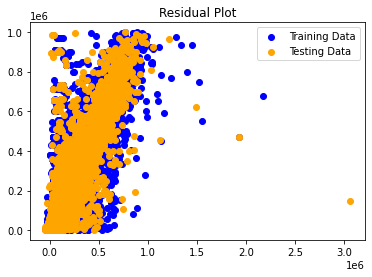

In [10]:
# Plot trained data and test data
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()

## Standard Scaler Model 

In [11]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

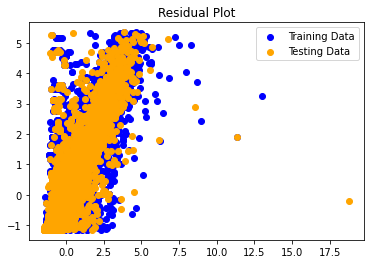

In [14]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()

In [15]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE_LR = mean_squared_error(y_test_scaled, predictions)
r2_LR = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_LR,3)}, R2: {round(r2_LR,3)}")

MSE: 0.235, R2: 0.766


## LASSO Model

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE_lasso = mean_squared_error(y_test_scaled, predictions)
r2_lasso = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_lasso,3)}, R2: {round(r2_lasso,3)}")

MSE: 0.237, R2: 0.763


## Ridge Model

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)

MSE_ridge = mean_squared_error(y_test_scaled, predictions)
r2_ridge = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_ridge,3)}, R2: {round(r2_ridge,3)}")

MSE: 0.235, R2: 0.766


## ElasticNet Model

In [18]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)

MSE_EL = mean_squared_error(y_test_scaled, predictions)
r2_EL = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_EL,3)}, R2: {round(r2_EL,3)}")

MSE: 0.234, R2: 0.766


### Model Scores 

In [19]:
# Display scores of all models tested
r2_results = [r2_LR, r2_lasso, r2_ridge, r2_EL]
MSE_results = [MSE_LR, MSE_lasso, MSE_ridge, MSE_EL]
r2_indices = ['Linear Regression','LASSO','Ridge','ElasticNet']

pd.DataFrame({"R2 Score": r2_results, "MSE Score": MSE_results}, index=[r2_indices]).sort_values('R2 Score', ascending=False)

,R2 Score,MSE Score
ElasticNet,0.766089,0.234269
Ridge,0.765749,0.234610
Linear Regression,0.765699,0.234660
LASSO,0.763379,0.236984


In [20]:
# Look at variables with the most impact on the models
correlated_variables = X.columns

pd.DataFrame({'LR Magnitudes': model.coef_[0],
              'LASSO Magnitudes': lasso.coef_,
              'Ridge Magnitudes': ridge.coef_[0],
              'ElasticNet Magnitudes': elasticnet.coef_}, 
              index=[correlated_variables]).sort_values('LR Magnitudes', ascending=False)

,LR Magnitudes,LASSO Magnitudes,Ridge Magnitudes,ElasticNet Magnitudes
market_value,6.704238e+11,0.772119,0.353197,0.615941
total_livable_area,5.997945e-02,0.034515,0.059864,0.051456
number_of_bathrooms,1.944461e-02,0.008673,0.019367,0.015245
garage_spaces,1.667508e-02,0.000000,0.016608,0.009518
fireplaces,1.635178e-02,0.009696,0.016514,0.013644
number_stories,8.464486e-03,0.000000,0.008409,0.002465
year_built,-2.131127e-04,0.000000,-0.000157,0.000000
zip_code,-1.617387e-03,-0.000000,-0.001600,-0.000000
geographic_ward,-5.356881e-03,-0.000000,-0.005403,-0.003863
number_of_bedrooms,-1.793974e-02,-0.007870,-0.017865,-0.014253
